In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
transactions = pd.read_csv('/home/olksndr/project/transactions.csv')

In [4]:
transactions.columns

Index(['WEEK_END_DATE', 'STORE_NUM', 'UPC', 'UNITS', 'VISITS', 'HHS', 'SPEND',
       'PRICE', 'BASE_PRICE', 'FEATURE', 'DISPLAY', 'TPR_ONLY'],
      dtype='object')

In [5]:
transactions = transactions.rename(index = str, columns={'PRICE': 'base_price', 'BASE_PRICE': 'price'})

In [6]:
transactions = transactions.drop('SPEND', axis = 1)

In [7]:
transactions['SPEND'] = transactions['price'] * transactions['UNITS']

In [8]:
transactions.head(2)

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,base_price,price,FEATURE,DISPLAY,TPR_ONLY,SPEND
0,14-Jan-09,367,1111009477,13,13,13,1.39,1.57,0,0,1,20.41
1,14-Jan-09,367,1111009497,20,18,18,1.39,1.39,0,0,0,27.80


In [10]:
transactions.WEEK_END_DATE = pd.to_datetime(transactions.WEEK_END_DATE)

In [11]:
unique_stores = transactions.STORE_NUM.unique()

In [12]:
unique_products = transactions.UPC.unique()

In [13]:

store_a_prod_a = transactions[(transactions.UPC == unique_products[3]) & (transactions.STORE_NUM == unique_stores[2])]

In [14]:
store_a_prod_a

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,base_price,price,FEATURE,DISPLAY,TPR_ONLY,SPEND
WEEK_END_DATE,,,,,,,,,,,,
2009-01-14,2009-01-14,389,1111035398,4,3,3,3.50,4.49,0,0,1,17.96
2009-01-21,2009-01-21,389,1111035398,2,2,2,3.33,4.49,0,0,1,8.98
2009-01-28,2009-01-28,389,1111035398,2,2,2,3.50,4.49,0,0,1,8.98
2009-02-04,2009-02-04,389,1111035398,7,4,4,3.50,4.49,0,0,1,31.43
2009-02-11,2009-02-11,389,1111035398,1,1,1,4.49,4.49,0,0,0,4.49
2009-02-25,2009-02-25,389,1111035398,1,1,1,4.49,4.49,0,0,0,4.49
2009-03-04,2009-03-04,389,1111035398,2,2,2,4.49,4.49,0,0,0,8.98
2009-03-11,2009-03-11,389,1111035398,2,2,2,3.99,4.49,0,0,1,8.98
2009-03-18,2009-03-18,389,1111035398,3,3,3,3.99,4.49,0,0,1,13.47


In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# FITTING THE PED constants:

In [26]:
data = transactions[(transactions.UPC == unique_products[3]) & (transactions.STORE_NUM == unique_stores[1])]

In [27]:
data.shape

(131, 12)

In [28]:
data.head()

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,base_price,price,FEATURE,DISPLAY,TPR_ONLY,SPEND
WEEK_END_DATE,,,,,,,,,,,,
2009-01-14,2009-01-14,387,1111035398,4,4,4,3.50,4.49,0,0,1,17.96
2009-01-21,2009-01-21,387,1111035398,8,7,7,3.50,4.49,0,0,1,35.92
2009-01-28,2009-01-28,387,1111035398,2,2,2,3.50,4.49,0,0,1,8.98
2009-02-04,2009-02-04,387,1111035398,6,6,6,3.67,4.49,0,0,1,26.94
2009-08-05,2009-08-05,387,1111035398,15,15,15,3.00,3.00,0,0,0,45.00


In [84]:
linear_model = ols("UNITS ~ price", data=data).fit()

linear_model.params

In [32]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  UNITS   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     3.106
Date:                Mon, 26 Nov 2018   Prob (F-statistic):             0.0804
Time:                        15:49:23   Log-Likelihood:                -373.01
No. Observations:                 131   AIC:                             750.0
Df Residuals:                     129   BIC:                             755.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.9992      4.329      3.927      0.0

In [45]:
def f(x):
    return linear_model.params['Intercept']+linear_model.params['price']*x

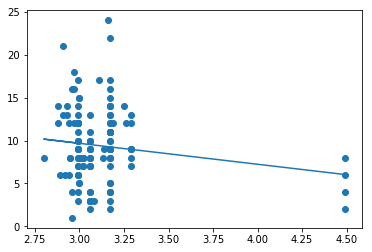

In [47]:
plt.scatter(data.price, data.UNITS)


plt.plot(data.price, f(data.price))

In [ ]:
estimated_PED = data.apply(lambda x:linear_model.params['Intercept']+linear_model.params['price']*x.price, axis=1).astype(int)

In [54]:
# Fitting the income to price dependency

# extrapolate = (data.SPEND - data.base_price*data.UNITS_)*(linear_model.params['Intercept']+linear_model.params['price']*data.price)

In [55]:
import numpy as np

In [117]:
def extrapolator(data, linear_model):
    actual_base_price = data.base_price.iloc[-1]
    
    x = np.arange(data.price.min(), data.price.max() + 5, 0.01)
    y = []
    
    for i in range(x.shape[0]):
        y.append((x[i] - actual_base_price)*(linear_model.params['Intercept']+linear_model.params['price']*x[i]))
    
    return x, y

In [91]:
current_price = data.price.iloc[-1]


In [94]:
current_price

2.99

In [97]:
x = np.arange(data.price.min(), data.price.max()+5, 0.01)
y = []

for i in range(x.shape[0]):
    y.append((x[i] - actual_base_price)*(linear_model.params['Intercept']+linear_model.params['price']*x[i]))

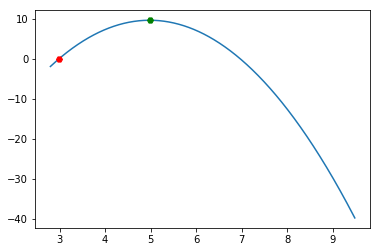

In [98]:
plt.plot(x,y)

plt.plot(x[np.array(y).argmax(axis=0)], np.array(y).max(), 'g H')
plt.plot(current_price, (current_price - actual_base_price)*(linear_model.params['Intercept']+linear_model.params['price']*current_price), 'r H')

# additional testing

In [101]:
data = transactions[(transactions.UPC == unique_products[45]) & (transactions.STORE_NUM == unique_stores[54])]

In [103]:
linear_model = ols("UNITS ~ price", data=data).fit()

linear_model.params

Intercept    11.921852
price        -3.262321
dtype: float64

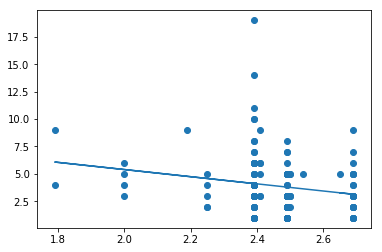

In [104]:
plt.scatter(data.price, data.UNITS)


plt.plot(data.price, f(data.price))

In [113]:


current_price = data.price.iloc[-1]

In [114]:
current_price

2.65

In [118]:
x,y = extrapolator(data, linear_model)

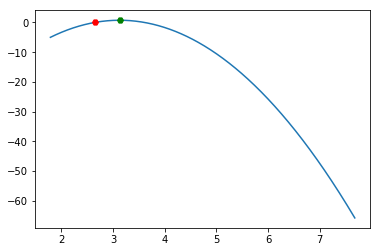

In [142]:
plt.plot(x,y)

plt.plot(x[np.array(y).argmax(axis=0)], np.array(y).max(), 'g H')
plt.plot(current_price, (current_price - actual_base_price)*(linear_model.params['Intercept']-linear_model.params['price']*current_price), 'r H')

In [143]:
y

[-5.009638984771898,
 -4.924124954473514,
 -4.839252392744458,
 -4.755021299584728,
 -4.671431674994325,
 -4.5884835189732485,
 -4.5061768315215,
 -4.424511612639076,
 -4.34348786232598,
 -4.26310558058221,
 -4.183364767407768,
 -4.104265422802651,
 -4.0258075467668615,
 -3.947991139300399,
 -3.870816200403263,
 -3.794282730075453,
 -3.7183907283169706,
 -3.643140195127814,
 -3.568531130507985,
 -3.494563534457482,
 -3.421237406976306,
 -3.348552748064458,
 -3.2765095577219343,
 -3.2051078359487364,
 -3.134347582744869,
 -3.0642287981103276,
 -2.9947514820451104,
 -2.925915634549219,
 -2.8577212556226588,
 -2.7901683452654242,
 -2.723256903477514,
 -2.6569869302589293,
 -2.5913584256096756,
 -2.5263713895297477,
 -2.462025822019144,
 -2.398321723077867,
 -2.335259092705919,
 -2.272837930903298,
 -2.2110582376700014,
 -2.149920013006031,
 -2.08942325691139,
 -2.0295679693860755,
 -1.9703541504300857,
 -1.9117818000434224,
 -1.853850918226088,
 -1.7965615049780803,
 -1.7399135602993971,


# lets create a fancier regressor

In [126]:
data.head(2)

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,base_price,price,FEATURE,DISPLAY,TPR_ONLY,SPEND
WEEK_END_DATE,,,,,,,,,,,,
2009-01-21,2009-01-21,21479,7797502248,3,3,3,2.39,2.39,0,0,0,7.17
2009-01-28,2009-01-28,21479,7797502248,2,2,2,2.39,2.39,0,0,0,4.78


In [124]:
from sklearn.linear_model import LinearRegression

In [125]:
lr = LinearRegression()

In [128]:
lr.fit(X=data[['price','FEATURE' ,'DISPLAY', 'TPR_ONLY']], y = data['UNITS'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [131]:
lr.intercept_

11.566305305673739

In [133]:
lr.coef_[0]

-3.2073428466334395

In [146]:
actual_base_price = data.base_price.iloc[-1]

x = np.arange(data.price.min(), data.price.max() + 5, 0.01)
y = []

for i in range(x.shape[0]):
    y.append((x[i] - actual_base_price)*(lr.intercept_+lr.coef_[0]*x[i]))

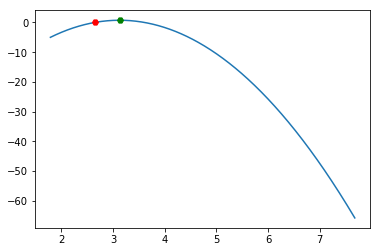

In [149]:
plt.plot(x,y)

plt.plot(x[np.array(y).argmax(axis=0)], np.array(y).max(), 'g H')
plt.plot(current_price, (current_price - actual_base_price)*(lr.intercept_+lr.coef_[0]*current_price), 'r H')

In [156]:

','.join(pd.read_csv('/home/olksndr/projects/products.csv').columns)

'UPC,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE'

In [157]:
# enlarge the observations number

In [158]:
import psycopg2

/home/olksndr/enviroments/tfdeeplearning/lib/python3.5/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [11]:
conn = psycopg2.connect("host = localhost dbname = gal user = postgres")

NameError: name 'psycopg2' is not defined

In [160]:
cur = conn.cursor()

In [161]:
cur.execute("""select * from transactions LEFT JOIN products on transactions.UPC = products.UPC""")

In [162]:
data = cur.fetchall()

In [175]:
columns = "WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,upc,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE".split(',')

In [173]:
(data[0])

(datetime.date(2009, 1, 14),
 367,
 1111009477,
 13,
 13,
 13,
 18.07,
 1.39,
 1.57,
 0,
 0,
 1,
 1111009477,
 'PL MINI TWIST PRETZELS',
 'PRIVATE LABEL',
 'BAG SNACKS',
 'PRETZELS',
 '15 OZ')

In [177]:

df = pd.DataFrame(data, columns=columns)

In [12]:
df.columns 

NameError: name 'df' is not defined

In [182]:
df.head().CATEGORY.unique()

array(['BAG SNACKS', 'ORAL HYGIENE PRODUCTS'], dtype=object)

In [218]:
data = df[(df.STORE_NUM == unique_stores[22]) & (df.CATEGORY == 'BAG SNACKS')]

In [219]:

data.shape

(789, 18)

In [220]:
data = data.rename(index = str, columns={'PRICE': 'base_price', 'BASE_PRICE': 'price'})

In [221]:
data = data.drop('SPEND', axis = 1)

In [222]:
data['SPEND'] = data['price'] * data['UNITS']

In [223]:
data.WEEK_END_DATE = pd.to_datetime(data.WEEK_END_DATE)

In [224]:
data.index = data.WEEK_END_DATE

In [232]:
data.shape

(789, 18)

In [233]:
data = data.dropna()

In [234]:
lr = LinearRegression()

In [235]:
lr.fit(X=data[['price']], y = data['UNITS'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [236]:
lr.intercept_

6.718809358165631

# the coef doesnt change, given extra columns ( STRANGE)

In [237]:
lr.coef_[0]

-1.4870493394237314

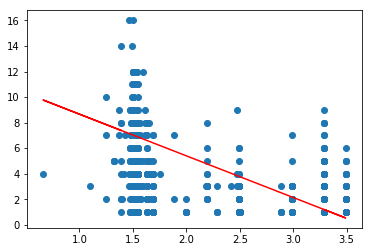

In [238]:
plt.scatter(data.price, data.UNITS)

#plt.plot( 'r -- ')
plt.plot(data.price, f(data.price), 'r')

In [240]:
data.base_price.iloc[-1]

3.29

In [247]:
actual_base_price = data.base_price.iloc[-1]

x = np.arange(data.price.min(), data.price.max() + 2, 0.01)
y = []

for i in range(x.shape[0]):
    y.append((x[i] - actual_base_price)*(lr.intercept_+lr.coef_[0]*x[i]))

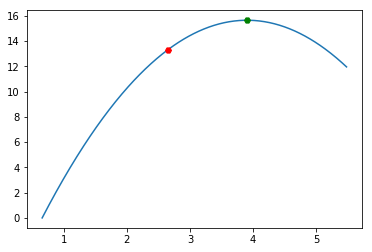

In [257]:
plt.plot(x,np.array(y) + abs(min(y)))

plt.plot(x[np.array(y).argmax(axis=0)], np.array(y).max()+abs(min(y)), 'g H')
plt.plot(current_price, (current_price - actual_base_price)*(lr.intercept_+lr.coef_[0]*current_price)+abs(min(y)), 'r H')

In [217]:
data.base_price

WEEK_END_DATE
2009-01-14    1.18
2009-01-14    1.19
2009-01-14    1.18
2009-01-14    2.49
2009-01-14    2.49
2009-01-14    2.49
2009-01-14    2.50
2009-01-21    0.96
2009-01-21    0.98
2009-01-21    0.98
2009-01-21    2.49
2009-01-21    2.49
2009-01-21    2.49
2009-01-21    2.39
2009-01-21    2.50
2009-01-28    0.97
2009-01-28    0.96
2009-01-28    1.00
2009-01-28    2.49
2009-01-28    2.49
2009-01-28    2.49
2009-01-28    2.39
2009-02-04    1.16
2009-02-04    1.15
2009-02-04    1.15
2009-02-04    2.49
2009-02-04    2.49
2009-02-04    2.49
2009-02-04    2.39
2009-02-11    1.17
              ... 
2011-12-07    2.69
2011-12-07    2.69
2011-12-14    1.21
2011-12-14    1.14
2011-12-14    1.23
2011-12-14    3.29
2011-12-14    3.29
2011-12-14    2.50
2011-12-14    3.29
2011-12-21    1.22
2011-12-21    1.17
2011-12-21    1.19
2011-12-21    3.29
2011-12-21    3.29
2011-12-21    2.50
2011-12-21    3.29
2011-12-28    1.20
2011-12-28    1.23
2011-12-28    1.19
2011-12-28    3.29
2011-12-28    3.2

# Try to increase oberved storages